In [3]:
! pip install -r requirements.txt

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = ''):
  return f'dataset/{file_name}'

In [5]:
import os

print(os.listdir(dataset()))

['corrected.gz', 'kddcup.data.gz', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'training_attack_types', 'typo-correction.txt']


In [6]:
with open(dataset("kddcup.names"),'r') as f:
  names = f.read()
  features = [name.split(':')[0].strip() for name in names.split('.')][1:-1] + ['target']

features

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [7]:
attack_types = {'normal': 'normal'}
with open(dataset("training_attack_types"),'r') as f:
  types = f.read()
  attack_types.update({t.split(' ')[0]: t.split(' ')[1] for t in types.split('\n')[:-2]})
attack_types

{'normal': 'normal',
 'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l'}

In [14]:
import pandas as pd

df = pd.read_csv(dataset('kddcup.data.gz'),names=features)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [15]:
df.shape

(4898431, 43)

In [10]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64


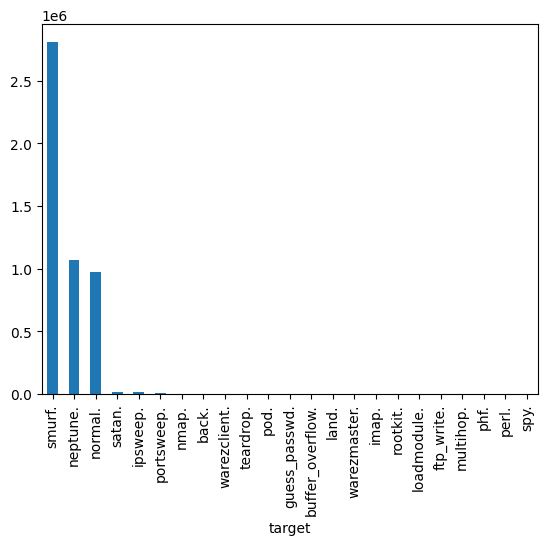

In [16]:
print(df['target'].value_counts())
bar_graph('target')

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64


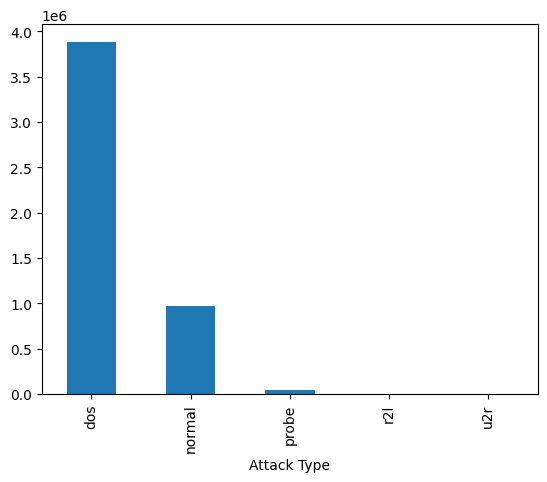

In [17]:
print(df['Attack Type'].value_counts())
bar_graph('Attack Type')

In [18]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

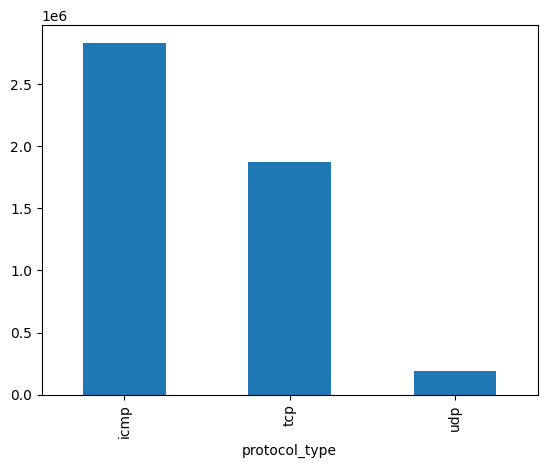

In [20]:
bar_graph('protocol_type')

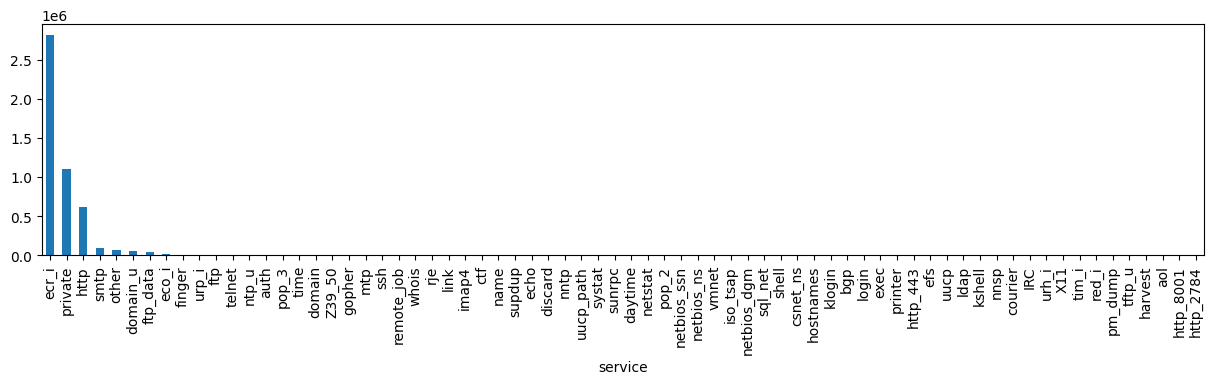

In [21]:
plt.figure(figsize=(15,3))
bar_graph('service')

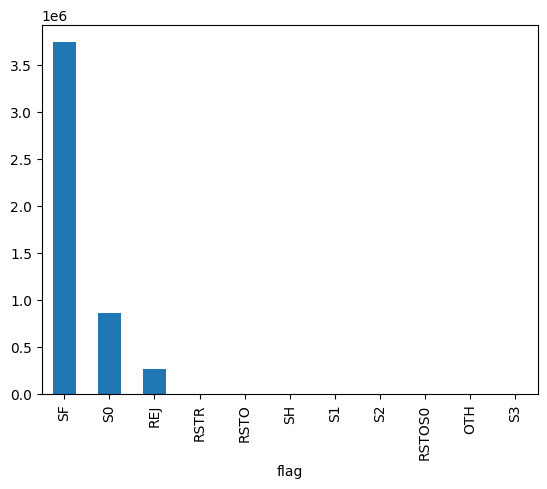

In [22]:
bar_graph('flag')

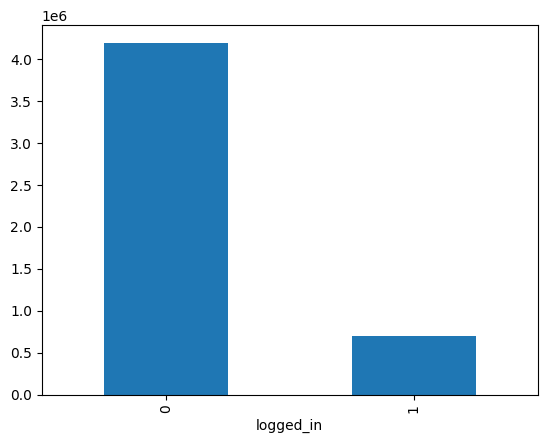

In [23]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

In [24]:
len(df.columns)

43

In [25]:
df = df.dropna(axis='columns')# drop columns with NaN

In [26]:
{col:df[col].nunique() for col in df}

{'duration': 9883,
 'protocol_type': 3,
 'service': 70,
 'flag': 11,
 'src_bytes': 7195,
 'dst_bytes': 21493,
 'land': 2,
 'wrong_fragment': 3,
 'urgent': 6,
 'hot': 30,
 'num_failed_logins': 6,
 'logged_in': 2,
 'num_compromised': 98,
 'root_shell': 2,
 'su_attempted': 3,
 'num_root': 93,
 'num_file_creations': 42,
 'num_shells': 3,
 'num_access_files': 10,
 'num_outbound_cmds': 1,
 'is_host_login': 2,
 'is_guest_login': 2,
 'count': 512,
 'srv_count': 512,
 'serror_rate': 96,
 'srv_serror_rate': 87,
 'rerror_rate': 89,
 'srv_rerror_rate': 76,
 'same_srv_rate': 101,
 'diff_srv_rate': 95,
 'srv_diff_host_rate': 72,
 'dst_host_count': 256,
 'dst_host_srv_count': 256,
 'dst_host_same_srv_rate': 101,
 'dst_host_diff_srv_rate': 101,
 'dst_host_same_src_port_rate': 101,
 'dst_host_srv_diff_host_rate': 76,
 'dst_host_serror_rate': 101,
 'dst_host_srv_serror_rate': 100,
 'dst_host_rerror_rate': 101,
 'dst_host_srv_rerror_rate': 101,
 'target': 23,
 'Attack Type': 5}

In [28]:
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

In [31]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,1
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,1
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,1
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,1
4898430,0,tcp,http,SF,219,1098,0,0,0,0,...,1.0,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.,1


In [30]:
df['Attack Type']=df['Attack Type'].astype('category').cat.codes

In [32]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


ValueError: could not convert string to float: 'tcp'

In [ ]:
corr.shape

(28, 28)

In [ ]:
corr['Attack Type']

duration                       0.137759
protocol_type                  0.575898
flag                           0.094497
src_bytes                      0.009479
dst_bytes                      0.065149
land                          -0.002593
wrong_fragment                -0.023350
urgent                         0.011767
hot                            0.148142
num_failed_logins              0.050133
num_compromised                0.005351
root_shell                     0.056487
su_attempted                   0.009225
num_file_creations             0.028376
num_shells                     0.028934
num_access_files               0.050544
is_guest_login                 0.140055
srv_count                     -0.561217
serror_rate                   -0.217871
rerror_rate                    0.077320
same_srv_rate                  0.207044
diff_srv_rate                  0.155283
srv_diff_host_rate             0.369762
dst_host_srv_count            -0.014931
dst_host_diff_srv_rate         0.289234


In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

KeyError: "['num_root'] not found in axis"

In [ ]:
df['service'].corr(df['Attack Type'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,9,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,1
1,0,1,9,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,1
2,0,1,9,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,1
3,0,1,9,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,1
4,0,1,9,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,1


In [ ]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

<ipython-input-13-2938f6df5f03>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
Attack Type                         0.451233
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_c

In [ ]:
df['protocol_type']=df['protocol_type'].astype('category').cat.codes
df['flag']=df['flag'].astype('category').cat.codes
# todo service can be removed
# df['service']=df['service'].astype('category').cat.codes
df = df.drop(['service',], axis=1)

In [ ]:
df = df.drop(['target',], axis=1)

In [ ]:
df.to_csv(dataset('dataset.csv'), index=False)

# Load data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas

def dataset(file_name:str = ''):
  return f'drive/MyDrive/ML-IDS/{file_name}'

In [ ]:
df = pandas.read_csv(dataset('dataset.csv'))

In [ ]:
for f,value in corr['Attack Type'].items():
  if abs(value) > 0.6 and f!='Attack Type':
    df.drop(f,axis = 1, inplace=True)
    print('dropped', f)
corr.shape

dropped logged_in
dropped count
dropped dst_host_count


(31, 31)

In [ ]:
df.shape

(494021, 27)

In [ ]:
# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type'], axis=1)
df = df.drop(['Attack Type'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=273)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(395216, 27) (98805, 27)
(395216, 1) (98805, 1)


In [ ]:
def fit(model):
  name = type(model).__name__
  start_time = time.time()
  model.fit(X_train, Y_train.values.ravel())
  end_time = time.time()
  print(f"{name}: Training time: ",end_time-start_time)

def fit_evaluate(model):
  name = type(model).__name__
  fit(model)

  start_time = time.time()
  Y_test_pred1 = model.predict(X_test)
  end_time = time.time()
  print(f"{name}: Testing time: ",end_time-start_time)

  print(f"{name}: Train score is:", model.score(X_train, Y_train))
  print(f"{name}: Test score is:", model.score(X_test,Y_test))


In [ ]:
from sklearn.naive_bayes import GaussianNB
fit_evaluate(GaussianNB())

GaussianNB: Training time:  0.2790529727935791
GaussianNB: Testing time:  0.09334874153137207
GaussianNB: Train score is: 0.7833539127970528
GaussianNB: Test score is: 0.7855169272810081


In [ ]:
from sklearn.tree import DecisionTreeClassifier
fit_evaluate(DecisionTreeClassifier(criterion="entropy", max_depth = 6))

DecisionTreeClassifier: Training time:  1.1393451690673828
DecisionTreeClassifier: Testing time:  0.01226806640625
DecisionTreeClassifier: Train score is: 0.9949622484919639
DecisionTreeClassifier: Test score is: 0.9946358989929659


In [ ]:
from sklearn.svm import SVC
fit_evaluate(SVC(gamma = 'scale'))

SVC: Training time:  183.63711309432983
SVC: Testing time:  32.67927813529968
SVC: Train score is: 0.9984869033642363
SVC: Test score is: 0.9982996811902232


In [ ]:
from sklearn.linear_model import LogisticRegression
fit_evaluate(LogisticRegression(max_iter=1200000))

LogisticRegression: Training time:  41.42000651359558
LogisticRegression: Testing time:  0.012194395065307617
LogisticRegression: Train score is: 0.9931025059714181
LogisticRegression: Test score is: 0.9931177571985224


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
fit_evaluate(GradientBoostingClassifier(random_state=220))

GradientBoostingClassifier: Training time:  297.6725513935089
GradientBoostingClassifier: Testing time:  0.6308994293212891
GradientBoostingClassifier: Train score is: 0.9977025221650946
GradientBoostingClassifier: Test score is: 0.9977227873083346


In [ ]:
from sklearn.ensemble import RandomForestClassifier
fit_evaluate(RandomForestClassifier(n_estimators=30))

RandomForestClassifier: Training time:  6.79488205909729
RandomForestClassifier: Testing time:  0.21174144744873047
RandomForestClassifier: Train score is: 0.9999671065948748
RandomForestClassifier: Test score is: 0.9996660088052224


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
fit_evaluate(AdaBoostClassifier(random_state=387))

AdaBoostClassifier: Training time:  16.237709522247314
AdaBoostClassifier: Testing time:  0.7233853340148926
AdaBoostClassifier: Train score is: 0.7644402048500061
AdaBoostClassifier: Test score is: 0.7675724912706847


In [ ]:
!! pip install scikeras

['Collecting scikeras',
 '  Downloading scikeras-0.12.0-py3-none-any.whl (27 kB)',
 'Requirement already satisfied: packaging>=0.21 in /usr/local/lib/python3.10/dist-packages (from scikeras) (24.0)',
 'Requirement already satisfied: scikit-learn>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikeras) (1.2.2)',
 'Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.0.0->scikeras) (1.25.2)',
 'Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.0.0->scikeras) (1.11.4)',
 'Requirement already satisfied: joblib>=1.1.1 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.0.0->scikeras) (1.3.2)',
 'Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.0.0->scikeras) (3.3.0)',
 'Installing collected packages: scikeras',
 'Successfully installed scikeras-0.12.0']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import keras
import tensorflow as tf
import gc

try:
  keras.backend.clear_session()
  del ann
  gc.collect()
except:
  pass

kerasModel = Sequential()

#here 30 is output dimension
kerasModel.add(Dense(27,input_dim =27,activation = 'relu',kernel_initializer='random_uniform'))

#in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
kerasModel.add(Dense(10,activation='sigmoid',kernel_initializer='random_uniform'))

#5 classes-normal,dos,probe,r2l,u2r
kerasModel.add(Dense(5,activation='softmax'))

#loss is categorical_crossentropy which specifies that we have multiple classes

kerasModel.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

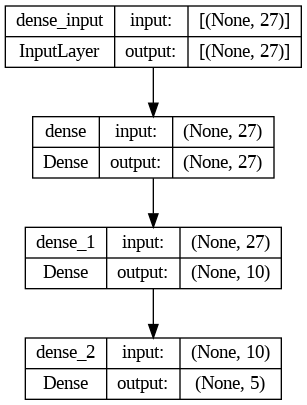

In [ ]:
from keras.utils import plot_model
plot_model(kerasModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.utils import to_categorical

ann = KerasClassifier(model=kerasModel, epochs=10, batch_size=64)
Y_train_one_hot = to_categorical(Y_train, num_classes=5)
Y_test_one_hot = to_categorical(Y_test, num_classes=5)
start_time = time.time()
ann.fit(X_train, Y_train_one_hot)
end_time = time.time()
print(f"ANN: Training time: ",end_time-start_time)

ann_train_pred = ann.predict(X_train)
ann_test_pred = ann.predict(X_test)

ann_train_pred_scalar = np.argmax(ann_train_pred, axis=1)
ann_test_pred_scalar = np.argmax(ann_test_pred, axis=1)

print('Train accuracy:', accuracy_score(Y_train,ann_train_pred_scalar))
print('Test accuracy:', accuracy_score(Y_test,ann_test_pred_scalar))

Epoch 1/10
6176/6176 [==============================] - 27s 4ms/step - loss: 0.0936 - accuracy: 0.9759
Epoch 2/10
6176/6176 [==============================] - 21s 3ms/step - loss: 0.0191 - accuracy: 0.9947
Epoch 3/10
6176/6176 [==============================] - 22s 4ms/step - loss: 0.0106 - accuracy: 0.9971
Epoch 4/10
6176/6176 [==============================] - 24s 4ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 5/10
6176/6176 [==============================] - 22s 4ms/step - loss: 0.0073 - accuracy: 0.9982
Epoch 6/10
6176/6176 [==============================] - 21s 3ms/step - loss: 0.0066 - accuracy: 0.9985
Epoch 7/10
6176/6176 [==============================] - 22s 4ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 8/10
6176/6176 [==============================] - 21s 3ms/step - loss: 0.0059 - accuracy: 0.9986
Epoch 9/10
6176/6176 [==============================] - 22s 4ms/step - loss: 0.0057 - accuracy: 0.9986
Epoch 10/10
6176/6176 [==============================] - 22s 4ms/step - l